<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/mnist_digit_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D
from tensorflow.keras import Sequential

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


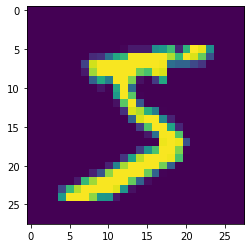

In [3]:
plt.imshow(X_train[0])

In [4]:
X_train.max()

255

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(X_train,y_train,batch_size=50,epochs=10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.1432 - accuracy: 0.9586 - val_loss: 0.0503 - val_accuracy: 0.9840
Epoch 2/10
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0876 - accuracy: 0.9739 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 3/10
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.0682 - accuracy: 0.9796 - val_loss: 0.0336 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 5/10
60000/60000 [==============================] - 150s 3ms/sample - loss: 0.0481 - accuracy: 0.9845 - val_loss: 0.0353 - val_accuracy: 0.9906
Epoch 6/10
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0269 - val_accuracy: 0.9902
Epoch 7/10
60000/60000 [==========================

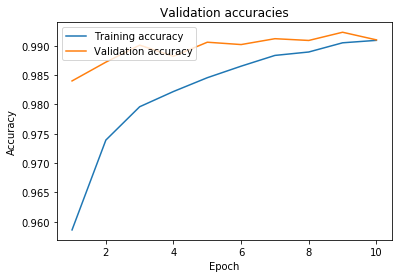

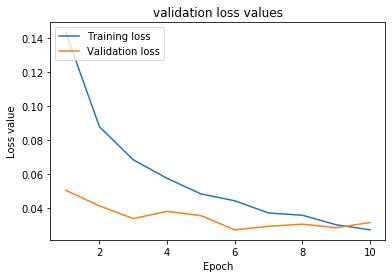

In [13]:
epochs=range(1,11)
plt.plot(epochs,history.history['accuracy'], label='Training accuracy')
plt.plot(epochs,history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(epochs,history.history['loss'], label='Training loss')
plt.plot(epochs,history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()